
# Parallel RLC Circuit Simulation

This notebook simulates the behavior of a parallel RLC circuit, focusing on impedance, reactance, and phase relationships as a function of frequency. The parallel RLC circuit is widely used in electrical and electronics engineering for applications like filters, oscillators, and tuning circuits.

Key features of this notebook include:
1. Graphs of impedance and reactance versus frequency.
2. Interactive plots to observe how impedance and current phasors vary with frequency.
3. Overlays of experimental measurements for comparison with theoretical predictions.
4. A phase angle graph showing the relationship between calculated and measured phase angles.
5. An animated phasor diagram to visualize the dynamic behavior of the circuit.

The aim of this notebook is to enhance understanding of the resonance phenomenon and the interplay of resistance, inductance, and capacitance in a parallel circuit.


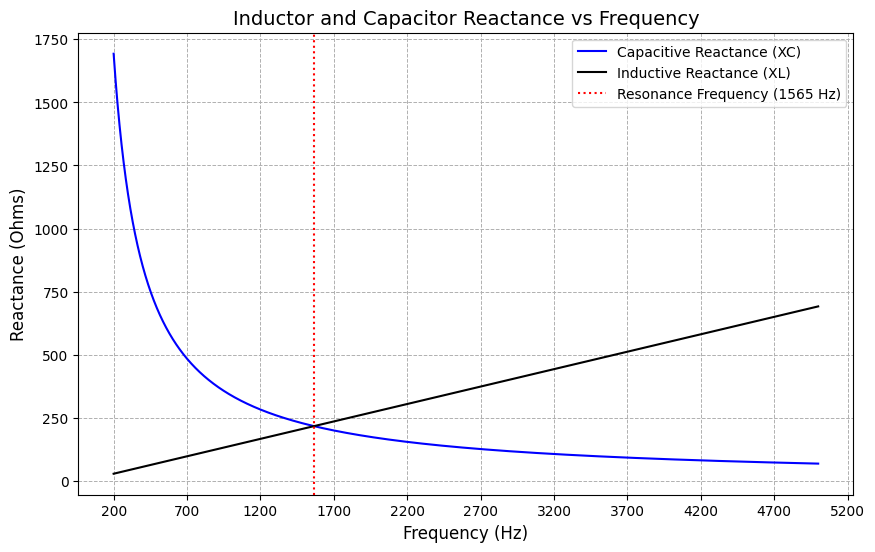

**Graph Description:**
This graph displays the reactance of an inductor (XL) and a capacitor (XC) as a function of frequency.
The x-axis represents frequency (Hz), and the y-axis represents reactance in ohms (Ω).

**Key Observations:**
1. Below resonance (200–1500 Hz): The capacitive reactance (XC) dominates, as seen by its higher values.
2. At resonance (~1565 Hz): The inductive and capacitive reactances are equal (XC = XL), resulting in reactive cancellation.
3. Above resonance (1600–5000 Hz): The inductive reactance (XL) dominates, increasing steadily with frequency.


In [55]:
import numpy as np
import matplotlib.pyplot as plt
# Given values
Vs = 2  # Supply Voltage
R = 40  # Resistance in Ohms
L = 22e-3  # Inductance in Henrys
C = 0.470e-6  # Capacitance in Farads

# Frequency vector updated to start at 200 Hz
f = np.arange(200, 5001, 1)  # From 200 to 5000 Hz with 1 Hz increments

# Capacitive Reactance
XC = 1 / (2 * np.pi * f * C)

# Inductive Reactance
XL = 2 * np.pi * f * L

# Enhanced Plotting
plt.figure(figsize=(10, 6))
plt.plot(f, XC, label='Capacitive Reactance (XC)', color='blue', linestyle='-')
plt.plot(f, XL, label='Inductive Reactance (XL)', color='black', linestyle='-')

# Adding Resonance Frequency Line
resonance_frequency = 1 / (2 * np.pi * np.sqrt(L * C))  # Calculated Resonant Frequency
plt.axvline(resonance_frequency, color='red', linestyle=':', label=f'Resonance Frequency ({int(resonance_frequency)} Hz)')

# Graph Titles and Labels
plt.title('Inductor and Capacitor Reactance vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reactance (Ohms)', fontsize=12)

# Grid, Legend, and Ticks
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(fontsize=10)
xticks = np.arange(200, 5500, 500)  # Custom x-axis ticks
plt.xticks(xticks)
plt.show()

# Adding Explanatory Text Below the Graph
print("**Graph Description:**")
print("This graph displays the reactance of an inductor (XL) and a capacitor (XC) as a function of frequency.")
print("The x-axis represents frequency (Hz), and the y-axis represents reactance in ohms (Ω).")
print("\n**Key Observations:**")
print("1. Below resonance (200–1500 Hz): The capacitive reactance (XC) dominates, as seen by its higher values.")
print("2. At resonance (~1565 Hz): The inductive and capacitive reactances are equal (XC = XL), resulting in reactive cancellation.")
print("3. Above resonance (1600–5000 Hz): The inductive reactance (XL) dominates, increasing steadily with frequency.")



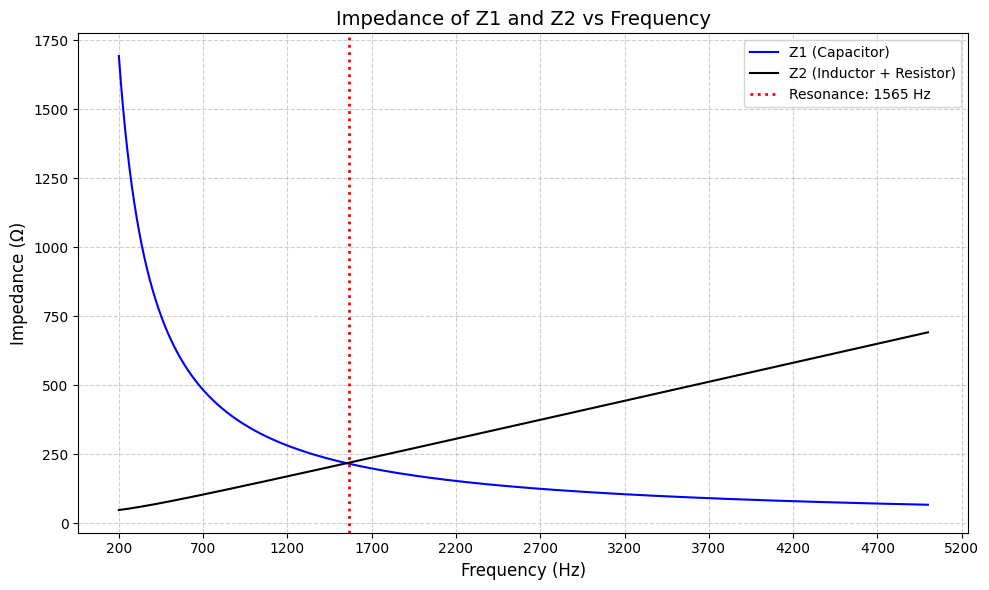

**Graph 1: Impedance of Z1 and Z2 vs Frequency**
This graph shows the impedance of the capacitor (Z1) and the inductor-resistor branch (Z2).
- X-axis: Frequency (Hz)
- Y-axis: Impedance (Ω)

**Key Observations:**
1. Z1 (blue) decreases with frequency (XC = 1/(2πfC)).
2. Z2 (black) increases with frequency (XL = 2πfL).
3. At resonance (~1565 Hz), Z1 and Z2 intersect.



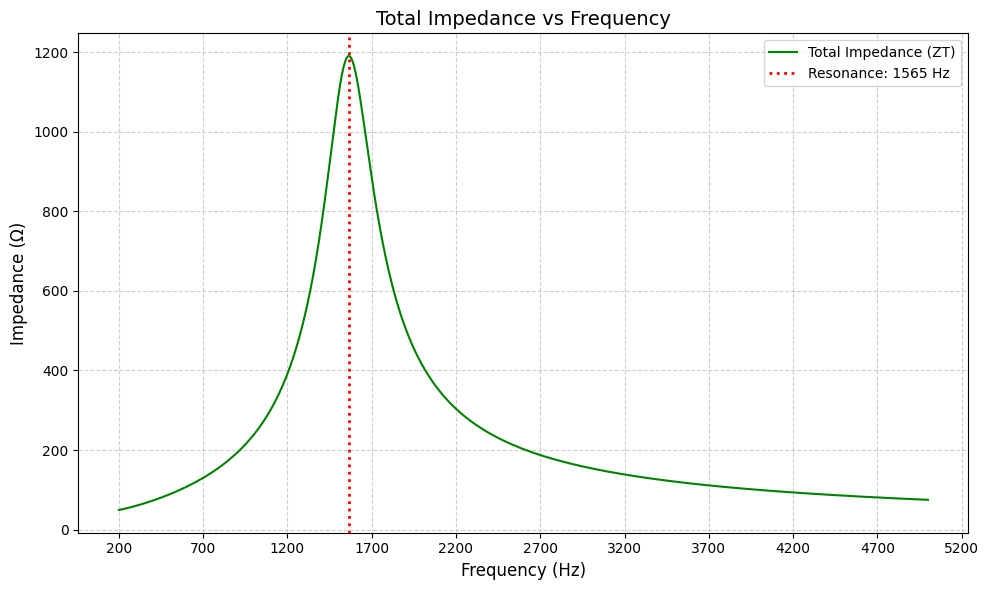

**Graph 2: Total Impedance (ZT) vs Frequency**
This graph shows the total impedance of the parallel RLC circuit.
- X-axis: Frequency (Hz)
- Y-axis: Impedance (Ω)

**Key Observations:**
1. ZT peaks at resonance (~1565 Hz) due to reactive current cancellation.
2. Below/above resonance, ZT decreases as capacitive/inductive branches dominate.



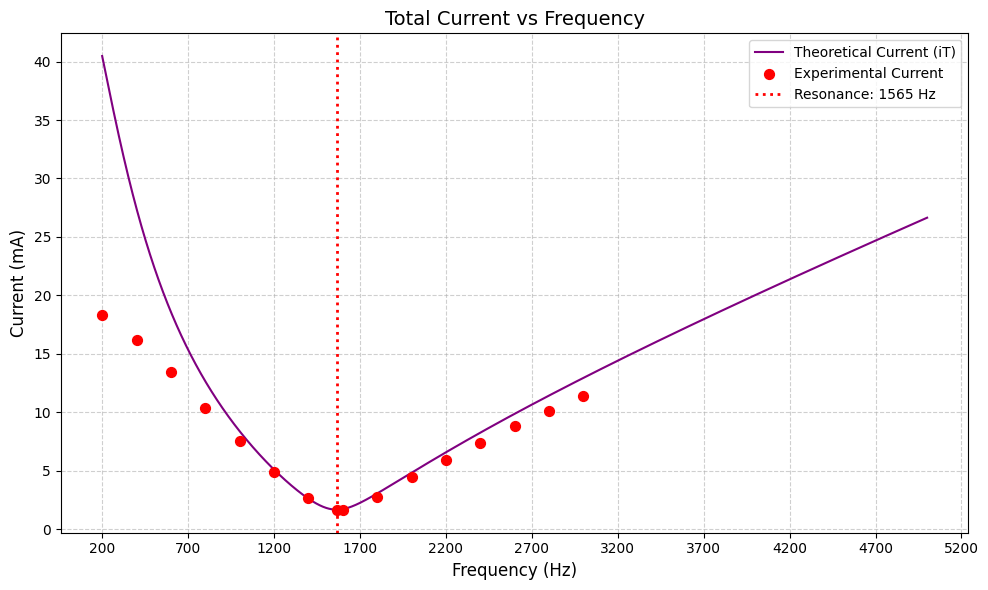

**Graph 3: Total Current vs Frequency**
This graph compares theoretical and experimental current.
- X-axis: Frequency (Hz)
- Y-axis: Current (mA)

**Key Observations:**
1. Experimental data (red circles) closely matches theoretical predictions.
2. Minimum current occurs at resonance (~1565 Hz).



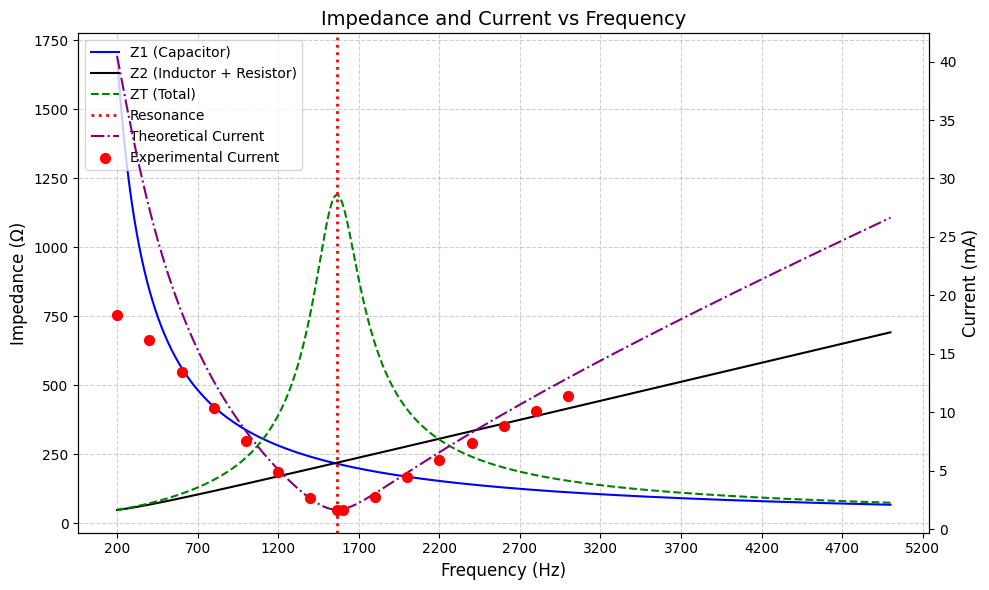

**Graph 4: Combined Impedance and Current**
This plot shows impedance (left) and current (right) with experimental data.
- X-axis: Frequency (Hz)
- Left Y-axis: Impedance (Ω)
- Right Y-axis: Current (mA)

**Key Observations:**
1. Experimental current aligns with the inverse relationship between ZT and current.
2. Resonance minimizes current while maximizing impedance.



In [56]:

import numpy as np
import matplotlib.pyplot as plt

# Circuit Parameters
Vs = 2.0       # Supply voltage (V)
R = 40         # Resistance (Ω)
L = 22e-3      # Inductance (H)
C = 0.470e-6   # Capacitance (F)

# Frequency range
f = np.arange(200, 5001, 1)  # 200 Hz to 5 kHz

# Reactance Calculations
XC = 1 / (2 * np.pi * f * C)
XL = 2 * np.pi * f * L

# Impedance Calculations
Z1 = -1j * XC                 # Capacitor impedance
Z1_mag = np.abs(Z1)           # Magnitude of Z1
Z2 = R + 1j * XL              # Inductor + resistor impedance
Z2_mag = np.abs(Z2)           # Magnitude of Z2
ZT = (Z1 * Z2) / (Z1 + Z2)    # Total impedance
ZT_mag = np.abs(ZT)           # Magnitude of total impedance
# Calculate current in each branch
iLR = Vs / Z2  # Current through the LR branch
# Calculate current in each branch
iC = Vs / Z1  # Current through the capacitor branch

# Current Calculations
iT = Vs / ZT                  # Total current (A)
iT_mag = np.abs(iT)           # Magnitude of total current
iT_mA = iT_mag * 1000         # Convert to milliamperes (mA)

# Resonance Frequency
resonance_freq = 1 / (2 * np.pi * np.sqrt(L * C))  # ~1565 Hz

# Experimental Data (From Lab 7)
f_exp = np.array([200, 400, 600, 800, 1000, 1200, 1400, 1565,
                  1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000])
iT_exp_mA = np.array([18.35, 16.2, 13.44, 10.4, 7.51, 4.91, 2.72, 1.65,
                      1.66, 2.796, 4.5, 5.94, 7.42, 8.8, 10.15, 11.4])

# --------------------------
# Plot 1: Z1 and Z2 vs Frequency
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, Z1_mag, label='Z1 (Capacitor)', color='blue')
plt.plot(f, Z2_mag, label='Z2 (Inductor + Resistor)', color='black')
plt.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label=f'Resonance: {int(resonance_freq)} Hz')
plt.title('Impedance of Z1 and Z2 vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Impedance (Ω)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(200, 5500, 500))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("**Graph 1: Impedance of Z1 and Z2 vs Frequency**")
print("This graph shows the impedance of the capacitor (Z1) and the inductor-resistor branch (Z2).")
print("- X-axis: Frequency (Hz)")
print("- Y-axis: Impedance (Ω)")
print("\n**Key Observations:**")
print("1. Z1 (blue) decreases with frequency (XC = 1/(2πfC)).")
print("2. Z2 (black) increases with frequency (XL = 2πfL).")
print("3. At resonance (~1565 Hz), Z1 and Z2 intersect.\n")

# --------------------------
# Plot 2: Total Impedance (ZT) vs Frequency
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, ZT_mag, label='Total Impedance (ZT)', color='green', linestyle='-')
plt.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label=f'Resonance: {int(resonance_freq)} Hz')
plt.title('Total Impedance vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Impedance (Ω)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(200, 5500, 500))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("**Graph 2: Total Impedance (ZT) vs Frequency**")
print("This graph shows the total impedance of the parallel RLC circuit.")
print("- X-axis: Frequency (Hz)")
print("- Y-axis: Impedance (Ω)")
print("\n**Key Observations:**")
print("1. ZT peaks at resonance (~1565 Hz) due to reactive current cancellation.")
print("2. Below/above resonance, ZT decreases as capacitive/inductive branches dominate.\n")

# --------------------------
# Plot 3: Total Current vs Frequency (With Experimental Data)
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, iT_mA, label='Theoretical Current (iT)', color='purple', linestyle='-')
plt.scatter(f_exp, iT_exp_mA, color='red', marker='o', s=50, label='Experimental Current', zorder=5)
plt.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label=f'Resonance: {int(resonance_freq)} Hz')
plt.title('Total Current vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Current (mA)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(200, 5500, 500))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("**Graph 3: Total Current vs Frequency**")
print("This graph compares theoretical and experimental current.")
print("- X-axis: Frequency (Hz)")
print("- Y-axis: Current (mA)")
print("\n**Key Observations:**")
print("1. Experimental data (red circles) closely matches theoretical predictions.")
print("2. Minimum current occurs at resonance (~1565 Hz).\n")

# --------------------------
# Plot 4: Combined Plot with Experimental Current
# --------------------------
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(f, Z1_mag, label='Z1 (Capacitor)', color='blue')
ax1.plot(f, Z2_mag, label='Z2 (Inductor + Resistor)', color='black')
ax1.plot(f, ZT_mag, label='ZT (Total)', color='green', linestyle='--')
ax1.set_xlabel('Frequency (Hz)', fontsize=12)
ax1.set_ylabel('Impedance (Ω)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label='Resonance')

ax2 = ax1.twinx()
ax2.plot(f, iT_mA, label='Theoretical Current', color='purple', linestyle='-.')
ax2.scatter(f_exp, iT_exp_mA, color='red', marker='o', s=50, label='Experimental Current', zorder=5)
ax2.set_ylabel('Current (mA)', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='upper left')

plt.title('Impedance and Current vs Frequency', fontsize=14)
plt.xticks(np.arange(200, 5500, 500))
plt.tight_layout()
plt.show()

print("**Graph 4: Combined Impedance and Current**")
print("This plot shows impedance (left) and current (right) with experimental data.")
print("- X-axis: Frequency (Hz)")
print("- Left Y-axis: Impedance (Ω)")
print("- Right Y-axis: Current (mA)")
print("\n**Key Observations:**")
print("1. Experimental current aligns with the inverse relationship between ZT and current.")
print("2. Resonance minimizes current while maximizing impedance.\n")


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Create phasor plot of Impedance

# Frequency range
f_start = 200  # Start frequency in Hz
f_end = 5000   # End frequency in Hz

# Function to plot a phasor given a frequency
def plot_impedance_phasor(frequency=f_start):
    plt.figure(figsize=(6, 6))

    # Calculate the index from the frequency
    index = int((frequency - f_start) / ((f_end - f_start) / (len(ZT) - 1)))

    # Extract the complex value for the calculated index
    zT_val = ZT[index] # z_val is a singel impedance value
    # Logarithmic plot of the phasor
    zT_val_mag_log = np.log10(np.abs(zT_val))
    zT_val_angle = np.angle(zT_val)
    zT_val_log = zT_val_mag_log * (np.cos(zT_val_angle) + 1j * np.sin(zT_val_angle))
    plt.quiver(0, 0, zT_val_log.real, zT_val_log.imag, angles='xy', scale_units='xy', scale=1, color='black', width=0.01, label='Total Impedance')

    # Extract the complex value for the calculated index
    z1_val = Z1[index] # z_val is a singel impedance value
    # Logarithmic plot of the phasor
    z1_val_mag_log = np.log10(np.abs(z1_val))
    z1_val_angle = np.angle(z1_val)
    z1_val_log = z1_val_mag_log * (np.cos(z1_val_angle) + 1j * np.sin(z1_val_angle))
    plt.quiver(0, 0, z1_val_log.real, z1_val_log.imag, angles='xy', scale_units='xy', scale=1, color='cyan', width=0.01, label='Z1 (Cap)')

    # Extract the complex value for the calculated index
    z2_val = Z2[index] # z_val is a singel impedance value
    # Logarithmic plot of the phasor
    z2_val_mag_log = np.log10(np.abs(z2_val))
    z2_val_angle = np.angle(z2_val)
    z2_val_log = z2_val_mag_log * (np.cos(z2_val_angle) + 1j * np.sin(z2_val_angle))
    plt.quiver(0, 0, z2_val_log.real, z2_val_log.imag, angles='xy', scale_units='xy', scale=1, color='magenta', width=0.01, label='Z2 Ind and Res')

    # Formatting the plot
    plt.xlim(-3.1, 3.1)
    plt.ylim(-3.1, 3.1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.title(f'Impedance (Log10) at Frequency: {frequency} Hz')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()  # Display the legend
    plt.show()

# Create an interactive slider for frequency instead of index
interact(plot_impedance_phasor, frequency=IntSlider(min=f_start, max=f_end, step=int((f_end - f_start) / (len(ZT) - 1)), value=f_start, description='Frequency (Hz)'))

print("**Graph: Interactive Impedance Phasor Diagram**")
print("This interactive graph displays the phasor representation of impedances (logarithmic scale) at a given frequency.")
print("- The cyan arrow represents the capacitor impedance (Z1).")
print("- The magenta arrow represents the inductor-resistor impedance (Z2).")
print("- The black arrow represents the total impedance (ZT), which is the parallel combination of Z1 and Z2.")
print("\n**Key Observations:**")
print("1. Below resonance, Z1 (capacitor) dominates, and its phasor is nearly vertical (imaginary).")
print("2. At resonance, Z1 and Z2 phasors align in magnitude but are opposite in direction, leading to minimal reactive effects.")
print("3. Above resonance, Z2 (inductor-resistor) dominates, and its phasor is nearly horizontal (real).")
print("4. The total impedance (ZT) aligns closer to the resistive axis at resonance.")


interactive(children=(IntSlider(value=200, description='Frequency (Hz)', max=5000, min=200), Output()), _dom_c…

**Graph: Interactive Impedance Phasor Diagram**
This interactive graph displays the phasor representation of impedances (logarithmic scale) at a given frequency.
- The cyan arrow represents the capacitor impedance (Z1).
- The magenta arrow represents the inductor-resistor impedance (Z2).
- The black arrow represents the total impedance (ZT), which is the parallel combination of Z1 and Z2.

**Key Observations:**
1. Below resonance, Z1 (capacitor) dominates, and its phasor is nearly vertical (imaginary).
2. At resonance, Z1 and Z2 phasors align in magnitude but are opposite in direction, leading to minimal reactive effects.
3. Above resonance, Z2 (inductor-resistor) dominates, and its phasor is nearly horizontal (real).
4. The total impedance (ZT) aligns closer to the resistive axis at resonance.


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Assuming iT, iLR, and iC are already defined as per previous examples

# Frequency range
f_start = 200  # Start frequency in Hz
f_end = 5000   # End frequency in Hz

# Function to plot current phasors given a frequency
def plot_current_phasor(frequency=f_start):
    plt.figure(figsize=(6, 6))

    # Calculate the index from the frequency
    index = int((frequency - f_start) / ((f_end - f_start) / (len(iT) - 1)))

    # Plot total current phasor
    iT_val = iT[index] * 1000  # Convert to milliamps
    iT_val_log = np.log10(np.abs(iT_val)) * (np.cos(np.angle(iT_val)) + 1j * np.sin(np.angle(iT_val)))
    plt.quiver(0, 0, iT_val_log.real, iT_val_log.imag, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='Total Current')

    # Plot LR branch current phasor
    iLR_val = iLR[index] * 1000  # Convert to milliamps
    iLR_val_log = np.log10(np.abs(iLR_val)) * (np.cos(np.angle(iLR_val)) + 1j * np.sin(np.angle(iLR_val)))
    plt.quiver(0, 0, iLR_val_log.real, iLR_val_log.imag, angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='LR Branch Current')

    # Plot C branch current phasor
    iC_val = iC[index] * 1000  # Convert to milliamps
    iC_val_log = np.log10(np.abs(iC_val)) * (np.cos(np.angle(iC_val)) + 1j * np.sin(np.angle(iC_val)))
    plt.quiver(0, 0, iC_val_log.real, iC_val_log.imag, angles='xy', scale_units='xy', scale=1, color='black', width=0.01, label='C Branch Current')

    # Formatting the plot
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.title(f'Current Phasors (Log10) at Frequency: {frequency} Hz')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()  # Display the legend
    plt.show()

# Create an interactive slider for frequency
interact(plot_current_phasor, frequency=IntSlider(min=f_start, max=f_end, step=int((f_end - f_start) / (len(iT) - 1)), value=f_start, description='Frequency (Hz)'))

print("**Graph: Interactive Current Phasor Diagram**")
print("This interactive graph displays the phasor representation of currents in the parallel RLC circuit at a given frequency.")
print("- The red arrow represents the total current (iT).")
print("- The blue arrow represents the current through the inductor-resistor branch (iLR).")
print("- The black arrow represents the current through the capacitor branch (iC).")
print("\n**Key Observations:**")
print("1. Below resonance, iC dominates and its phasor is nearly vertical (capacitive).")
print("2. At resonance, the reactive components (iC and iLR) cancel each other, minimizing the total current (iT).")
print("3. Above resonance, iLR dominates, and its phasor becomes nearly vertical (inductive).")
print("4. The total current (iT) phasor always aligns with the combination of iC and iLR, highlighting the phase relationships.")


interactive(children=(IntSlider(value=200, description='Frequency (Hz)', max=5000, min=200), Output()), _dom_c…

**Graph: Interactive Current Phasor Diagram**
This interactive graph displays the phasor representation of currents in the parallel RLC circuit at a given frequency.
- The red arrow represents the total current (iT).
- The blue arrow represents the current through the inductor-resistor branch (iLR).
- The black arrow represents the current through the capacitor branch (iC).

**Key Observations:**
1. Below resonance, iC dominates and its phasor is nearly vertical (capacitive).
2. At resonance, the reactive components (iC and iLR) cancel each other, minimizing the total current (iT).
3. Above resonance, iLR dominates, and its phasor becomes nearly vertical (inductive).
4. The total current (iT) phasor always aligns with the combination of iC and iLR, highlighting the phase relationships.


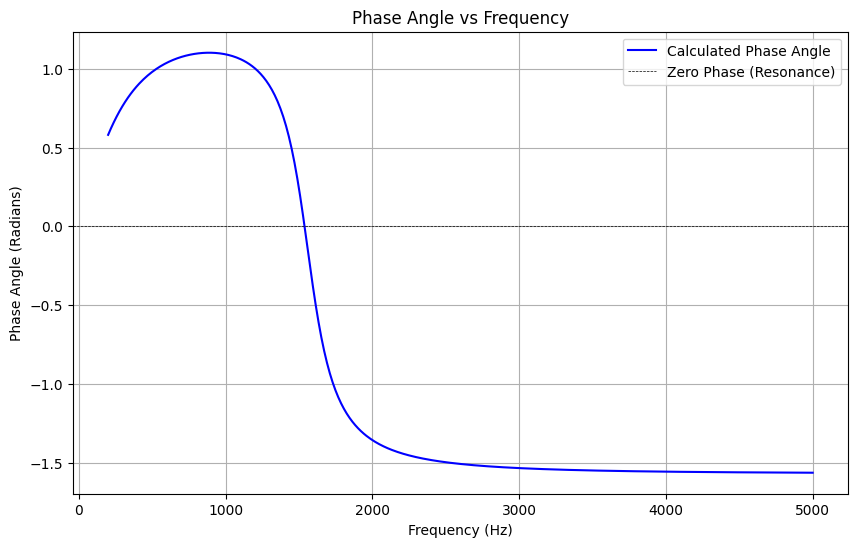

**Graph: Phase Angle vs Frequency**
This graph displays the calculated phase angle of the total impedance (ZT) as a function of frequency.
- The blue curve represents the theoretical phase angle, calculated from the impedance values of the parallel RLC circuit.
- The dashed black line indicates zero phase, which occurs at resonance.

**Key Observations:**
1. Below resonance, the phase angle is negative, indicating that the current leads the voltage (capacitive behavior).
2. At resonance (~1565 Hz), the phase angle is zero, as the reactive components cancel out completely.
3. Above resonance, the phase angle becomes positive, indicating that the current lags the voltage (inductive behavior).
4. The smooth transition through zero highlights the frequency-dependent nature of the reactive components in the circuit.


In [59]:

import numpy as np
import matplotlib.pyplot as plt

# Circuit Parameters
Vs = 2.0       # Supply voltage (V)
R = 40         # Resistance (Ω)
L = 22e-3      # Inductance (H)
C = 0.470e-6   # Capacitance (F)

# Frequency range
frequencies = np.linspace(200, 5000, 500)

# Reactance Calculations
XC = 1 / (2 * np.pi * frequencies * C)
XL = 2 * np.pi * frequencies * L

# Impedance Calculations
Z1 = -1j * XC                 # Capacitor impedance
Z2 = R + 1j * XL              # Inductor + resistor impedance
ZT = (Z1 * Z2) / (Z1 + Z2)    # Total impedance

# Calculate Phase Angle (Radians)
phase_calculated = np.angle(ZT)

# Plot the phase angle
plt.figure(figsize=(10, 6))
plt.plot(frequencies, phase_calculated, label="Calculated Phase Angle", color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label="Zero Phase (Resonance)")
plt.title("Phase Angle vs Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Angle (Radians)")
plt.legend()
plt.grid(True)
plt.show()

print("**Graph: Phase Angle vs Frequency**")
print("This graph displays the calculated phase angle of the total impedance (ZT) as a function of frequency.")
print("- The blue curve represents the theoretical phase angle, calculated from the impedance values of the parallel RLC circuit.")
print("- The dashed black line indicates zero phase, which occurs at resonance.")
print("\n**Key Observations:**")
print("1. Below resonance, the phase angle is negative, indicating that the current leads the voltage (capacitive behavior).")
print("2. At resonance (~1565 Hz), the phase angle is zero, as the reactive components cancel out completely.")
print("3. Above resonance, the phase angle becomes positive, indicating that the current lags the voltage (inductive behavior).")
print("4. The smooth transition through zero highlights the frequency-dependent nature of the reactive components in the circuit.")


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Assuming Vs, iT, and f are already defined

# Frequency range
f_start = 200  # Start frequency in Hz
f_end = 5000   # End frequency in Hz

# Function to plot voltage and current phasors at a given frequency
def plot_voltage_current_phasor(frequency=f_start):
    plt.figure(figsize=(6, 6))

    # Calculate the index from the frequency
    index = int((frequency - f_start) / ((f_end - f_start) / (len(iT) - 1)))

    # Voltage phasor
    v_val = Vs
    v_mag_log = np.log10(np.abs(v_val))
    v_angle = 0  # Voltage is reference (angle = 0)
    v_log = v_mag_log * (np.cos(v_angle) + 1j * np.sin(v_angle))
    plt.quiver(0, 0, v_log.real, v_log.imag, angles='xy', scale_units='xy', scale=1, color='orange', width=0.01, label='Voltage (Vs)')

    # Total current phasor
    iT_val = iT[index] * 1000  # Convert to milliamps
    iT_mag_log = np.log10(np.abs(iT_val))
    iT_angle = np.angle(iT_val)
    iT_log = iT_mag_log * (np.cos(iT_angle) + 1j * np.sin(iT_angle))
    plt.quiver(0, 0, iT_log.real, iT_log.imag, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='Current (iT)')

    # Formatting the plot
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.title(f'Voltage and Current Phasors at Frequency: {frequency} Hz')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()  # Display the legend
    plt.show()

# Create an interactive slider for frequency
interact(plot_voltage_current_phasor, frequency=IntSlider(min=f_start, max=f_end, step=int((f_end - f_start) / (len(iT) - 1)), value=f_start, description='Frequency (Hz)'))

print("**Graph: Animated Voltage and Current Phasor Diagram**")
print("This interactive graph visualizes the relationship between voltage and current phasors as frequency changes.")
print("- The orange arrow represents the voltage phasor (Vs), which is the reference and remains constant in phase.")
print("- The red arrow represents the total current phasor (iT), which varies in magnitude and phase with frequency.")
print("\n**Key Observations:**")
print("1. Below resonance, the current (iT) lags the voltage due to the dominance of capacitive reactance.")
print("2. At resonance, the current (iT) is in phase with the voltage as the reactive effects cancel out.")
print("3. Above resonance, the current (iT) leads the voltage due to the dominance of inductive reactance.")
print("4. The magnitude and phase of the current phasor provide insights into the circuit's behavior at different frequencies.")


interactive(children=(IntSlider(value=200, description='Frequency (Hz)', max=5000, min=200), Output()), _dom_c…

**Graph: Animated Voltage and Current Phasor Diagram**
This interactive graph visualizes the relationship between voltage and current phasors as frequency changes.
- The orange arrow represents the voltage phasor (Vs), which is the reference and remains constant in phase.
- The red arrow represents the total current phasor (iT), which varies in magnitude and phase with frequency.

**Key Observations:**
1. Below resonance, the current (iT) lags the voltage due to the dominance of capacitive reactance.
2. At resonance, the current (iT) is in phase with the voltage as the reactive effects cancel out.
3. Above resonance, the current (iT) leads the voltage due to the dominance of inductive reactance.
4. The magnitude and phase of the current phasor provide insights into the circuit's behavior at different frequencies.
